## import required libraries

In [1]:
import pandas as pd
import numpy as np

## read the dataset

In [2]:
df=pd.read_csv('stroke_detection.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### There are missing values for bmi and we will replace it with the median value and check if there are any null values again

In [7]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Drop id column

In [8]:
df.drop(columns='id',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Categories Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Gender Analysis

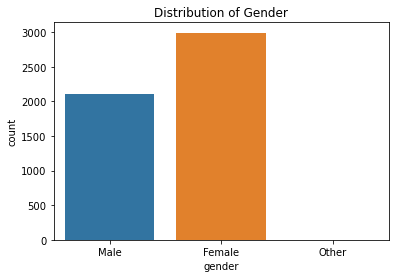

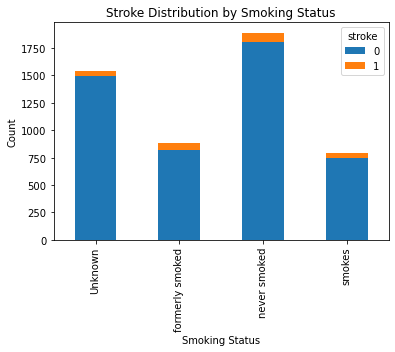

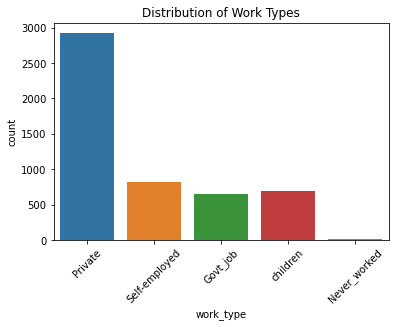

In [10]:
#Gender analysis

sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()


# Stacked Bar Plot for 'smoking_status' and 'stroke'
pd.crosstab(df['smoking_status'], df['stroke']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


# Count Plot for 'work_type'
sns.countplot(x='work_type', data=df)
plt.title('Distribution of Work Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Count the stroke occurances in the dataset

In [11]:
# Count the number of instances for each class
stroke_counts = df['stroke'].value_counts()

print("Number of instances for Stroke 0:", stroke_counts[0])
print("Number of instances for Stroke 1:", stroke_counts[1])

Number of instances for Stroke 0: 4861
Number of instances for Stroke 1: 249


## Prediction of stroke Using Classification method 

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Train and Predict

Classification Report for Random Forest on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3375
           1       1.00      1.00      1.00      3430

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805

Classification Report for SVM on Training Set:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      3375
           1       0.74      0.83      0.78      3430

    accuracy                           0.77      6805
   macro avg       0.77      0.77      0.77      6805
weighted avg       0.77      0.77      0.77      6805

Classification Report for Gradient Boosting on Training Set:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3375
           1       0.83      0.93      0.88      3430

    accuracy     

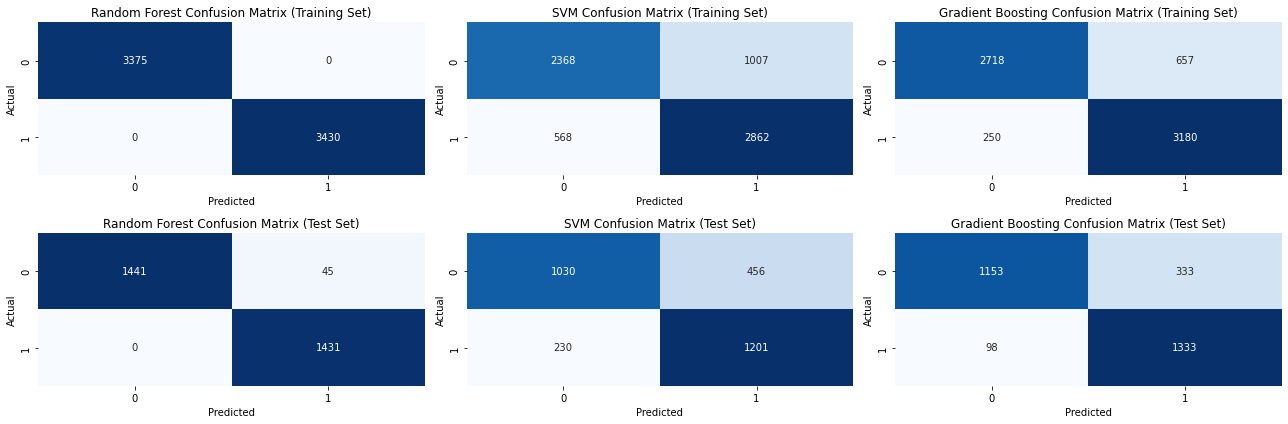

In [13]:
# 'X' contains features, and 'y' contains the target variable

# Convert categorical variables to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Separate the majority and minority classes
df_majority = df_encoded[df_encoded['stroke'] == 0]
df_minority = df_encoded[df_encoded['stroke'] == 1]

# Upsample the minority class
df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Reset index to avoid duplicate index issues
df_majority_reset = df_majority.reset_index(drop=True)
df_minority_upsampled_reset = df_minority_upsampled.reset_index(drop=True)

# Concatenate the upsampled minority class with the majority class
df_balanced = pd.concat([df_majority_reset, df_minority_upsampled_reset], ignore_index=True)

# Split the balanced dataset
X_balanced = df_balanced.drop('stroke', axis=1)
y_balanced = df_balanced['stroke']
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Train SVM classifier
svm_clf = SVC(random_state=42, probability=True)
svm_clf.fit(X_train, y_train)

# Train Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Evaluate on Training Set
for clf, name in zip([rf_clf, svm_clf, gb_clf], ['Random Forest', 'SVM', 'Gradient Boosting']):
    y_train_pred = clf.predict(X_train)
    print(f"Classification Report for {name} on Training Set:")
    print(classification_report(y_train, y_train_pred))

# Evaluate on Test Set
for clf, name in zip([rf_clf, svm_clf, gb_clf], ['Random Forest', 'SVM', 'Gradient Boosting']):
    y_test_pred = clf.predict(X_test)
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_test_pred))

# Plot confusion matrices for Random Forest, SVM, and Gradient Boosting on both Training and Test Sets
plt.figure(figsize=(18, 6))

for i, (clf, name) in enumerate(zip([rf_clf, svm_clf, gb_clf], ['Random Forest', 'SVM', 'Gradient Boosting']), 1):
    # Plot confusion matrix for Training Set
    plt.subplot(2, 3, i)
    cm_train = confusion_matrix(y_train, clf.predict(X_train))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix (Training Set)")

    # Plot confusion matrix for Test Set
    plt.subplot(2, 3, i+3)
    cm_test = confusion_matrix(y_test, clf.predict(X_test))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix (Test Set)")

plt.tight_layout()
plt.show()


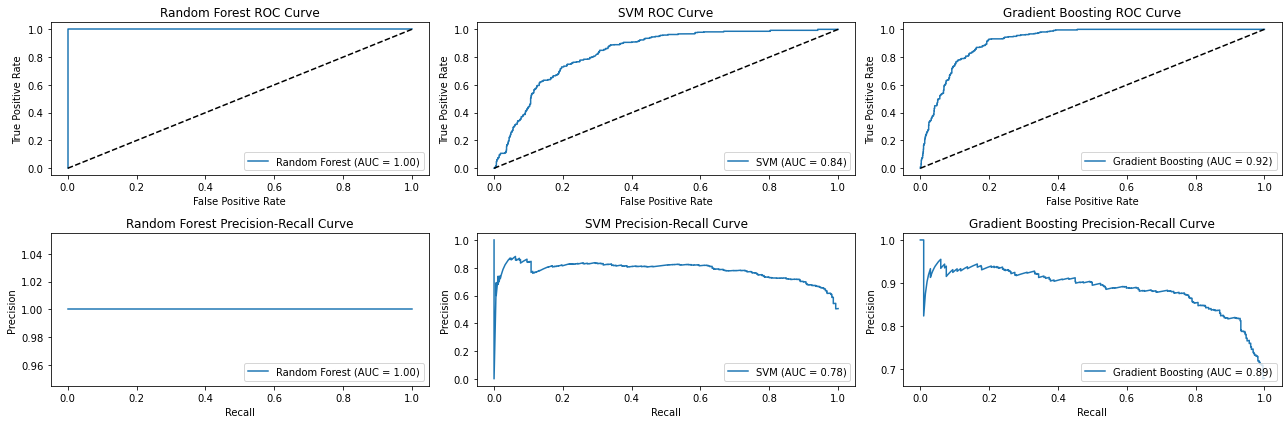

ROC AUC Scores:
Random Forest: 1.000
SVM: 0.837
Gradient Boosting: 0.920

Precision-Recall AUC Scores:
Random Forest: 1.000
SVM: 0.783
Gradient Boosting: 0.888


In [14]:
# Initialize the plot
plt.figure(figsize=(18, 6))

# Initialize lists to store AUC scores
roc_auc_scores = []
pr_auc_scores = []

# Loop through each classifier
for i, (clf, name) in enumerate(zip([rf_clf, svm_clf, gb_clf], ['Random Forest', 'SVM', 'Gradient Boosting']), 1):
    # Plot ROC curve
    plt.subplot(2, 3, i)
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((name, roc_auc))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='lower right')

    # Plot precision-recall curve
    plt.subplot(2, 3, i + 3)
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    pr_auc = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
    pr_auc_scores.append((name, pr_auc))
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC scores
print("ROC AUC Scores:")
for name, score in roc_auc_scores:
    print(f"{name}: {score:.3f}")

print("\nPrecision-Recall AUC Scores:")
for name, score in pr_auc_scores:
    print(f"{name}: {score:.3f}")

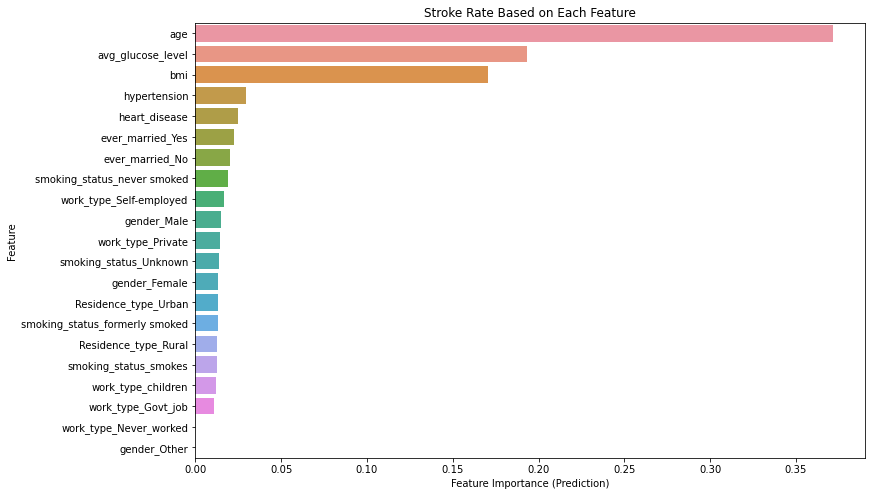

In [15]:
# Create a DataFrame with features and predictions
feature_predictions = pd.DataFrame({'Feature': X_balanced.columns, 'Prediction': rf_clf.feature_importances_})

# Plot stroke rate based on each feature
plt.figure(figsize=(12, 8))
sns.barplot(x='Prediction', y='Feature', data=feature_predictions.sort_values(by='Prediction', ascending=False))
plt.title('Stroke Rate Based on Each Feature')
plt.xlabel('Feature Importance (Prediction)')
plt.ylabel('Feature')
plt.show()